## Importing libraries

In [22]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
from keras.utils import to_categorical

In [23]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [24]:
#shape and type of x_train and y_train
print(f'X_train shape: {x_train.shape}\nX_train type: {type(x_train)}')
print(f'Y_train shape: {y_train.shape}\nY_train type: {type(y_train)}')

X_train shape: (60000, 28, 28)
X_train type: <class 'numpy.ndarray'>
Y_train shape: (60000,)
Y_train type: <class 'numpy.ndarray'>


In [25]:
#reshape
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

In [26]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [27]:
# Print the shape of the training and testing sets
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
y_train shape: (60000, 10)
y_test shape: (10000, 10)


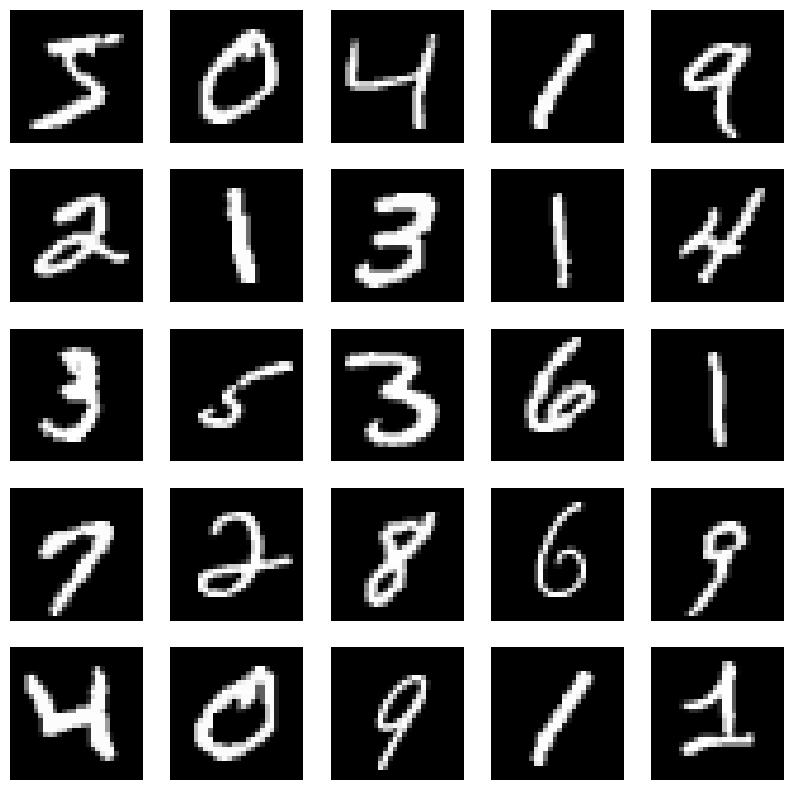

In [28]:
# Plot the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
plt.show()


In [29]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [30]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2038 - accuracy: 0.9384 - val_loss: 0.0450 - val_accuracy: 0.9850
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0751 - accuracy: 0.9772 - val_loss: 0.0328 - val_accuracy: 0.9889
Epoch 3/5
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0559 - accuracy: 0.9833 - val_loss: 0.0322 - val_accuracy: 0.9879
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0462 - accuracy: 0.9861 - val_loss: 0.0271 - val_accuracy: 0.9904
Epoch 5/5
1875/1875 [==============================] - 46s 25ms/step - loss: 0.0383 - accuracy: 0.9878 - val_loss: 0.0274 - val_accuracy: 0.9907


In [32]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test_flat, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.0274 - accuracy: 0.9907
Test accuracy: 0.9907000064849854


In [34]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0341 - accuracy: 0.9900 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 2/5
1875/1875 [==============================] - 37s 20ms/step - loss: 0.0284 - accuracy: 0.9915 - val_loss: 0.0261 - val_accuracy: 0.9918
Epoch 3/5
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0251 - accuracy: 0.9922 - val_loss: 0.0242 - val_accuracy: 0.9931
Epoch 4/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0297 - val_accuracy: 0.9912
Epoch 5/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0214 - accuracy: 0.9930 - val_loss: 0.0308 - val_accuracy: 0.9909


In [35]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)


313/313 [==============================] - 2s 6ms/step - loss: 0.0308 - accuracy: 0.9909
Test accuracy: 0.9908999800682068


313/313 [==============================] - 1s 4ms/step


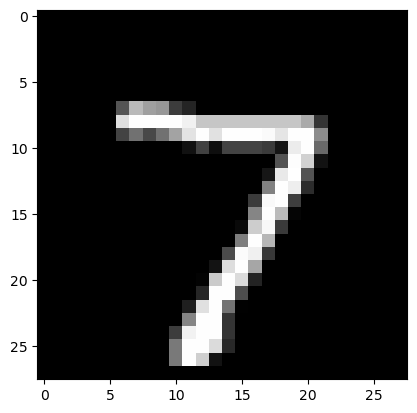

Predicted: 7
Actual: 7


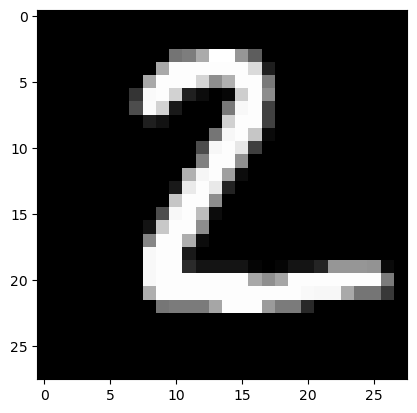

Predicted: 2
Actual: 2


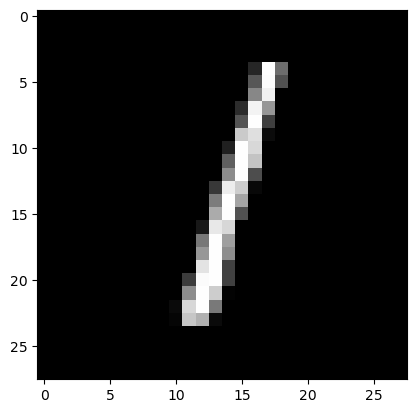

Predicted: 1
Actual: 1


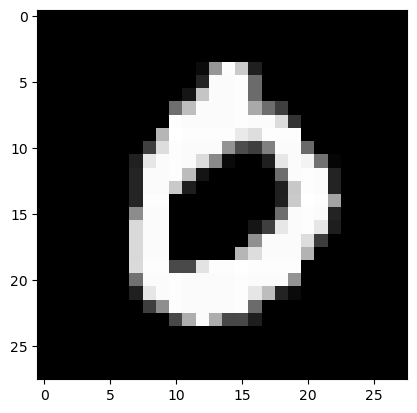

Predicted: 0
Actual: 0


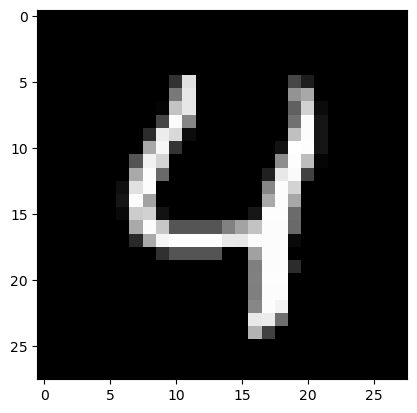

Predicted: 4
Actual: 4


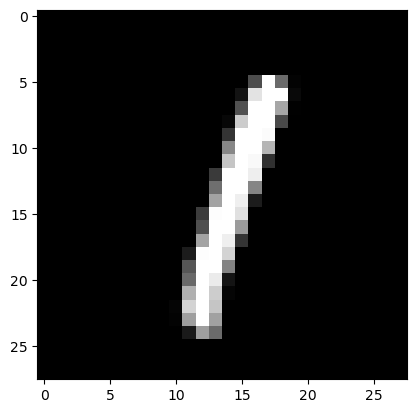

Predicted: 1
Actual: 1


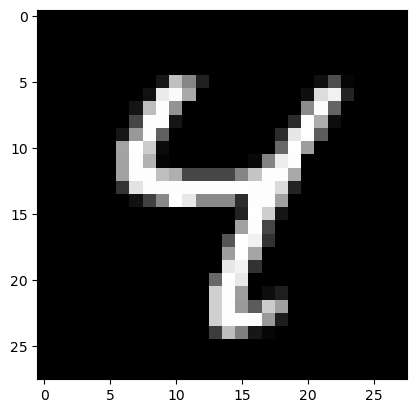

Predicted: 4
Actual: 4


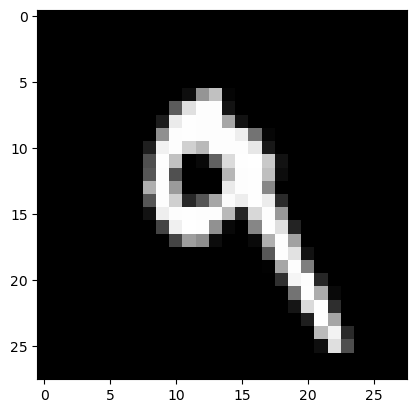

Predicted: 9
Actual: 9


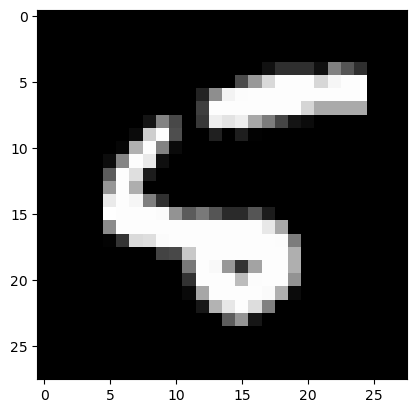

Predicted: 5
Actual: 5


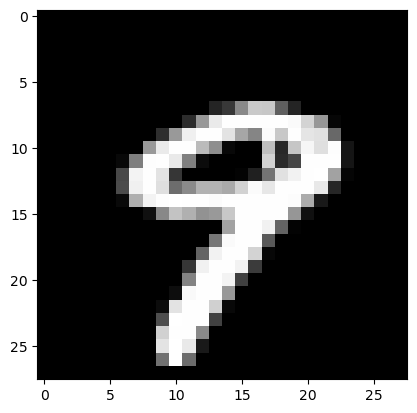

Predicted: 9
Actual: 9


In [50]:
#use trained model to predict on test data and show the image
predictions = model.predict(x_test)
for i in range(10):
    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.show()
    print(f'Predicted: {np.argmax(predictions[i])}')
    print(f'Actual: {np.argmax(y_test[i])}')
    